In [1]:
%pip install --user pandas scipy numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import time
import numpy as np
from scipy.stats import chisquare
import collections
import math
import matplotlib.pyplot as plt
import glob
import bz2
import os 

#### Data preparation

In [3]:
# Define a function to extract the leading digit from a string
def get_leading_digit(s):
    return int(s[0])

# Initialize a counter for the leading digits
leading_digits = collections.Counter()

# Retrieve all .trans files, change if needed
filenames = glob.glob('/mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/*.trans.bz2')
filenames = sorted(filenames)

# ## For sample input
# # get current repository
# current_directory = os.getcwd()
# filenames = glob.glob(os.path.join(current_directory, '*.trans.bz2'))

# Process each file
for filename in filenames:
    # Track the process of data reading
    print("Reading file: ", filename)
    
    # Open the file
    with bz2.open(filename, 'r') as file:
        # Loop over the lines in the file
        for line in file:
            # Decode the line to a string
            line = line.decode('utf-8')

            # Split the line on spaces (or appropriate delimiter)
            data = line.strip().split()
            
            # Extract the leading digit from the third column and update the counter
            leading_digits.update([get_leading_digit(data[2])])
                
# Count the frequency of each leading digit
observed_frequencies = dict(sorted(leading_digits.items()))
# Calculate the total count of leading digits
total_count = sum(leading_digits.values())



Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00000-00100.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00100-00200.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00200-00300.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00300-00400.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00400-00500.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00500-00600.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00600-00700.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00700-00800.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00800-00900.trans.bz2
Reading file:  /mnt/data/exomol/exomo

In [4]:
# Display the frequency of each leading digit
print(observed_frequencies)

{1: 2954496108, 2: 1730058111, 3: 1227915126, 4: 952185738, 5: 777650984, 6: 657231661, 7: 569180608, 8: 501955247, 9: 448931580}


#### Plot bar chat comparing the first digits of the observed (dataset) with the expected (Benford's Law) with Chi-square results

Chi-square statistic for Benford's Law expected frequency: 3269.178346494731
P-value for Benford's Law expected frequency: 0.0


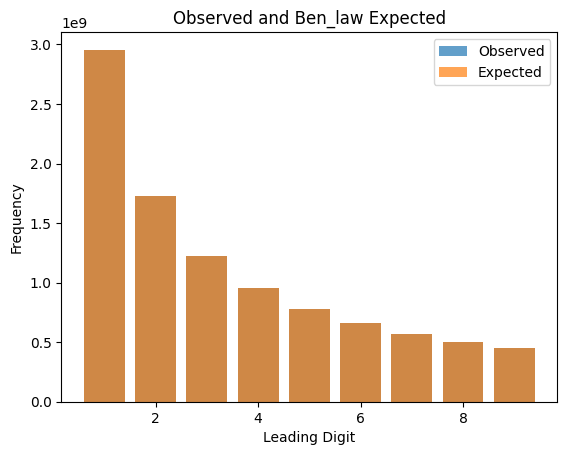

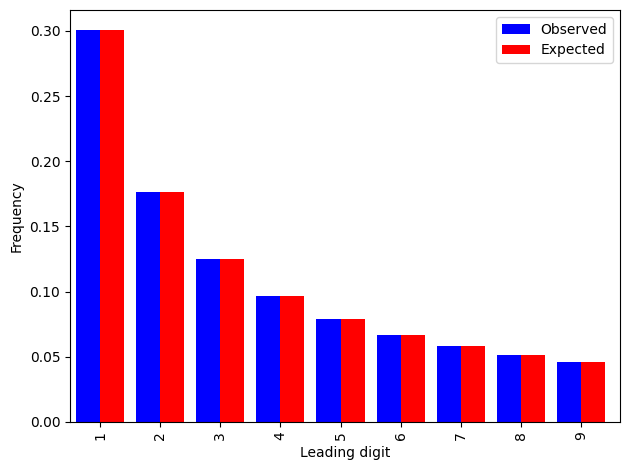

In [5]:
# Calculate the expected frequency for each leading digit under the assumption of Benford's Law
expected_frequencies_ben = {i: total_count * math.log10(1 + 1/i) for i in range(1, 10)}

# Perform a chi-square test
chi2_ben, p_ben = chisquare(list(observed_frequencies.values()), list(expected_frequencies_ben.values()))

# Perform chi-square test and display results
print(f"Chi-square statistic for Benford's Law expected frequency: {chi2_ben}")
print(f"P-value for Benford's Law expected frequency: {p_ben}")

# Plot observed vs. expected frequencies based on Benford's Law
plt.title('Observed and Ben_law Expected')
plt.bar(range(1, 10), [observed_frequencies[i] for i in range(1, 10)], alpha=0.7, label='Observed')
plt.bar(range(1, 10), [expected_frequencies_ben[i] for i in range(1, 10)], alpha=0.7, label='Expected')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Convert the frequencies to ratios
observed_ratios = {k: v / total_count for k, v in observed_frequencies.items()}

# Calculate expected frequencies according to Benford's law
expected_frequencies = {i: math.log10(1 + 1 / i) for i in range(1, 10)}

# Create a dataframe from the observed and expected ratios
df = pd.DataFrame({'observed': observed_ratios, 'expected': expected_frequencies})

# Create a bar plot
fig, ax = plt.subplots()
df['observed'].plot(kind='bar', color='blue', ax=ax, width=0.4, position=1, label='Observed')
df['expected'].plot(kind='bar', color='red', ax=ax, width=0.4, position=0, label='Expected')
ax.set_xlabel('Leading digit')
ax.set_ylabel('Frequency')
ax.set_xlim(left=-0.5)  
plt.tight_layout() 
plt.legend()
plt.show()


#### MAD tests

In [6]:
# Calculate the absolute deviation between the observed and expected ratios
df['absolute_difference'] = abs(df['observed'] - df['expected'])

# Print the absolute_deviation
print(df['absolute_difference'])

# Print Max and Min absolute_deviation
max_absolute_difference = df['absolute_difference'].max()
min_absolute_difference = df['absolute_difference'].min()
print(f'Max absolute difference: {max_absolute_difference}')
print(f'Min absolute difference: {min_absolute_difference}')

# Calculate and print the mean absolute_deviation
mean_absolute_difference = df['absolute_difference'].mean()
print(f'Mean absolute difference: {mean_absolute_difference}')

# Calculate and print Correlation between Observed and Expected Frequencies
correlation = df['observed'].corr(df['expected'])
print(f'Correlation: {correlation}')

1    0.000153
2    0.000093
3    0.000109
4    0.000058
5    0.000012
6    0.000016
7    0.000028
8    0.000035
9    0.000040
Name: absolute_difference, dtype: float64
Max absolute difference: 0.00015271404654310095
Min absolute difference: 1.2466030551938623e-05
Mean absolute difference: 6.0369541533015124e-05
Correlation: 0.9999995721222535


#### Z-statistic

Z-statistic for 1: -32.9907236778742
Z-statistic for 2: 24.148436449285743
Z-statistic for 3: 32.536291446737806
Z-statistic for 4: 19.36431282360772
Z-statistic for 5: 4.574851020725796
Z-statistic for 6: -6.435303101511834
Z-statistic for 7: -11.977609168130067
Z-statistic for 8: -15.680568624637358
Z-statistic for 9: -18.78201740506146


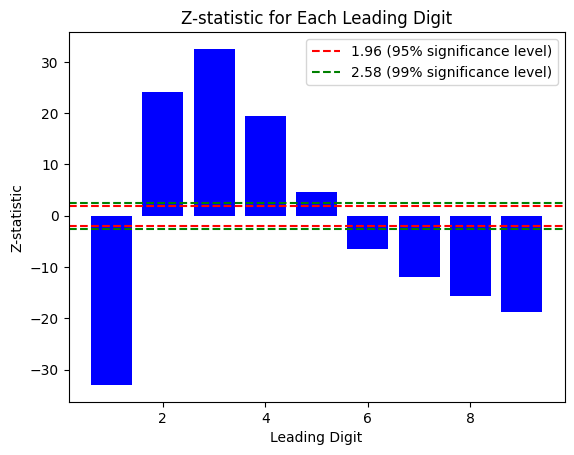

In [7]:
# Calculate Z-statistic for each leading digit
z_statistics = [(observed_ratios[i] - expected_frequencies[i]) / 
                np.sqrt(expected_frequencies[i] * (1 - expected_frequencies[i]) / total_count) 
                for i in range(1, 10)]

# Display Z-statistic for each leading digit
for i, z in enumerate(z_statistics, start=1):
    print(f"Z-statistic for {i}: {z}")

# visulised the z-statistic
plt.bar(range(1,10), z_statistics, color='blue')
plt.axhline(y=1.96, color='r', linestyle='--', label='1.96 (95% significance level)')
plt.axhline(y=-1.96, color='r', linestyle='--')
plt.axhline(y=2.58, color='g', linestyle='--', label='2.58 (99% significance level)')
plt.axhline(y=-2.58, color='g', linestyle='--')
plt.xlabel('Leading Digit')
plt.ylabel('Z-statistic')
plt.title('Z-statistic for Each Leading Digit')
plt.legend()
plt.show()

#### MAD test only

In [8]:
# Calculate the expected frequency for each leading digit under the assumption of Benford's Law
probability_distribution_ben = {i: math.log10(1 + 1/i) for i in range(1, 10)}

# Calculate the frequency for each leading digit under the observed dataset
probability_distribution_obv = {k: v / total_count for k, v in observed_frequencies.items()}

# Compute the MAD
MAD = sum(abs(probability_distribution_obv[d] - probability_distribution_ben[d]) for d in range(1, 10)) / 9
print('MAD: ', MAD)

MAD:  6.0369541533015124e-05
